 ## 0. Подгрузка модулей

In [154]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

directory = '/Users/vaneque/Desktop/Projects/credit_scoring_project/datasets/12_Prosper/'

# Prosper Loan Dataset

[Ссылка на скачивание](https://www.kaggle.com/yousuf28/prosper-loan)

Отличие от других таблиц заключается в том, что здесь таргетом является категориальное значение статуса кредита.



## 1. Подгрузка данных

In [155]:
df = pd.read_csv('prosperLoanData.csv', sep = ',')
df = df.rename(columns={'LoanStatus' :'target'})

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,target,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Выгружаем данные, вместо нескольких идентифицирующих переменных оставляем одну.

In [156]:
df.iloc[:, [0, 1, 2, 6, 23, 24, 27, 50, 62, 64, 65, 66]]

,ListingKey,ListingNumber,ListingCreationDate,ClosedDate,GroupKey,DateCreditPulled,FirstRecordedCreditLine,LoanKey,LoanNumber,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,E33A3400205839220442E84,19141,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,9E3B37071505919926B1D82,134815,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,6954337960046817851BCB2,6466,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,A0393664465886295619C51,77296,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,A180369302188889200689E,102670,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,9BD7367919051593140DB62,88485,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,62D93634569816897D5A276,55801,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,DD1A370200396006300ACA0,123122,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,589536350469116027ED11B,56401,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [157]:
len(df['LoanNumber'].unique())

113066

In [158]:
trash_factors = ['ListingKey', 'ClosedDate',
                 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',
                 'LoanKey', 'LoanNumber','LoanOriginationDate', 'LoanOriginationQuarter']
df = df.drop(trash_factors, axis=1)
for col in df.columns:
    df[col] = df[col].replace(True, 1)
    df[col] = df[col].replace(False, 0)

df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,target,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### 

## 2. Анализ факторов

У нас в данных лики! `LP_NetPrincipalLoss` почти идеально предскажет наличие дефолта. И таких факторов несколько.

In [159]:
df[['target', 'LP_NetPrincipalLoss']].loc[df.LP_NetPrincipalLoss > 0]

,target,LP_NetPrincipalLoss
15,Defaulted,3790.25
17,Chargedoff,6012.67
23,Defaulted,1882.27
42,Chargedoff,1096.92
57,Chargedoff,1569.03
...,...,...
113904,Chargedoff,6682.76
113905,Chargedoff,3325.15
113914,Defaulted,2883.00
113918,Defaulted,2176.51


Проверяем спорные по описанию факторы на наличие выбросов и закономерностей в данных.


_пример_

In [160]:
df[['target', 'LP_NetPrincipalLoss']].loc[df.LP_NetPrincipalLoss == 0].groupby('target').count()

,LP_NetPrincipalLoss
target,
Cancelled,5
Chargedoff,10
Completed,38074
Current,56576
Defaulted,285
FinalPaymentInProgress,205
Past Due (1-15 days),806
Past Due (16-30 days),265
Past Due (31-60 days),363


Приходим к выводу, что некоторые из факторов очень точно предсказывают дефолты (или недефолты), их мы запишем в лист с "опасными" переменными и исключим из выборки. Сомнительные факторы запишем в другой лист и тоже исключим. Источник не содержит даже краткого описания факторов, поэтому по названию предполагаем, что рассматриваемые и отобранные переменные были зафиксированы уже по прошествии некоторого времени после выдачи, а может и после закрытия кредита (или незакрытия).



In [161]:
risky_vals = ['LP_ServiceFees', 'LP_InterestandFees']
dang_vals = ['LP_NetPrincipalLoss', 'LP_GrossPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'LP_CollectionFees',  'LoanFirstDefaultedCycleNumber', 'LoanCurrentDaysDelinquent']


df = df.drop(risky_vals, axis=1)
df = df.drop(dang_vals, axis=1)


In [162]:
s = ''
num_vals = []
cat_vals = []
i = 0
for col in df.columns:
    
    if type(df[col][0]) in [np.int64, np.float64] and len(df[col].unique()) > 2:
        type_x = 'numeric'
        values = '-'
        num_vals.append(col)
    elif type(df[col][0]) in [np.int64, np.float64] and len(df[col].unique()) == 2:
        type_x = 'binary'
        values = '-'
        num_vals.append(col)
    else:
        type_x = 'qualitative'
        values = df[col].unique()
        cat_vals.append(col)
    
    
    s += f'| {i} | {col} | {type_x} |  | {values[0]} |\n'
    for j in range(1, len(values)):
        s += f'|  |  |  |  | {values[j]} |\n'
    i += 1

### Список факторов

| No. | Attribute | Type | Description | Values (if qualitative)
| -:- | --- | --- | --- | ---
| 0 | CreditGrade | qualitative | - | C |
|  |  |  |  | HR |
|  |  |  |  | AA |
|  |  |  |  | D |
|  |  |  |  | B |
|  |  |  |  | E |
|  |  |  |  | A |
|  |  |  |  | NC |
| 1 | Term | numeric | Term | - |
| 2 | target | qualitative | Loan status | Completed |
|  |  |  |  | Current |
|  |  |  |  | Past Due (1-15 days) |
|  |  |  |  | Defaulted |
|  |  |  |  | Chargedoff |
|  |  |  |  | Past Due (16-30 days) |
|  |  |  |  | Cancelled |
|  |  |  |  | Past Due (61-90 days) |
|  |  |  |  | Past Due (31-60 days) |
|  |  |  |  | Past Due (91-120 days) |
|  |  |  |  | FinalPaymentInProgress |
|  |  |  |  | Past Due (>120 days) |
| 3 | BorrowerAPR | numeric | Borrower Annual Percentage Rate | - |
| 4 | BorrowerRate | numeric | Borrower Rate | - |
| 5 | LenderYield | numeric | Lender Yield | - |
| 6 | EstimatedEffectiveYield | numeric | Estimated Effective Yield | - |
| 7 | EstimatedLoss | numeric | Estimated Loss | - |
| 8 | EstimatedReturn | numeric | Estimated Return | - |
| 9 | ProsperRating (numeric) | numeric | Prosper Rating (numeric) | - |
| 10 | ProsperRating (Alpha) | qualitative | Prosper Rating (Alpha) | A |
|  |  |  |  | D |
|  |  |  |  | B |
|  |  |  |  | E |
|  |  |  |  | C |
|  |  |  |  | AA |
|  |  |  |  | HR |
| 11 | ProsperScore | numeric | Prosper Score | - |
| 12 | ListingCategory (numeric) | numeric | Listing Category (numeric) | - |
| 13 | BorrowerState | qualitative | Borrower State | CO |
|  |  |  |  | GA |
|  |  |  |  | MN |
|  |  |  |  | NM |
|  |  |  |  | KS |
|  |  |  |  | CA |
|  |  |  |  | IL |
|  |  |  |  | MD |
|  |  |  |  | AL |
|  |  |  |  | AZ |
|  |  |  |  | VA |
|  |  |  |  | FL |
|  |  |  |  | PA |
|  |  |  |  | OR |
|  |  |  |  | MI |
|  |  |  |  | NY |
|  |  |  |  | LA |
|  |  |  |  | WI |
|  |  |  |  | OH |
|  |  |  |  | NC |
|  |  |  |  | WA |
|  |  |  |  | NV |
|  |  |  |  | NJ |
|  |  |  |  | TX |
|  |  |  |  | AR |
|  |  |  |  | SC |
|  |  |  |  | DE |
|  |  |  |  | MO |
|  |  |  |  | NE |
|  |  |  |  | UT |
|  |  |  |  | DC |
|  |  |  |  | MA |
|  |  |  |  | CT |
|  |  |  |  | IN |
|  |  |  |  | KY |
|  |  |  |  | OK |
|  |  |  |  | MS |
|  |  |  |  | WV |
|  |  |  |  | RI |
|  |  |  |  | TN |
|  |  |  |  | ID |
|  |  |  |  | MT |
|  |  |  |  | HI |
|  |  |  |  | NH |
|  |  |  |  | VT |
|  |  |  |  | WY |
|  |  |  |  | ME |
|  |  |  |  | AK |
|  |  |  |  | IA |
|  |  |  |  | SD |
|  |  |  |  | ND |
| 14 | Occupation | qualitative | Occupation | Other |
|  |  |  |  | Professional |
|  |  |  |  | Skilled Labor |
|  |  |  |  | Executive |
|  |  |  |  | Sales - Retail |
|  |  |  |  | Laborer |
|  |  |  |  | Food Service |
|  |  |  |  | Fireman |
|  |  |  |  | Waiter/Waitress |
|  |  |  |  | Construction |
|  |  |  |  | Computer Programmer |
|  |  |  |  | Sales - Commission |
|  |  |  |  | Retail Management |
|  |  |  |  | Engineer - Mechanical |
|  |  |  |  | Military Enlisted |
|  |  |  |  | Clerical |
|  |  |  |  | Teacher |
|  |  |  |  | Clergy |
|  |  |  |  | Accountant/CPA |
|  |  |  |  | Attorney |
|  |  |  |  | Nurse (RN) |
|  |  |  |  | Analyst |
|  |  |  |  | Nurse's Aide |
|  |  |  |  | Investor |
|  |  |  |  | Realtor |
|  |  |  |  | Flight Attendant |
|  |  |  |  | Nurse (LPN) |
|  |  |  |  | Military Officer |
|  |  |  |  | Food Service Management |
|  |  |  |  | Truck Driver |
|  |  |  |  | Administrative Assistant |
|  |  |  |  | Police Officer/Correction Officer |
|  |  |  |  | Social Worker |
|  |  |  |  | Tradesman - Mechanic |
|  |  |  |  | Medical Technician |
|  |  |  |  | Professor |
|  |  |  |  | Postal Service |
|  |  |  |  | Civil Service |
|  |  |  |  | Pharmacist |
|  |  |  |  | Tradesman - Electrician |
|  |  |  |  | Scientist |
|  |  |  |  | Dentist |
|  |  |  |  | Engineer - Electrical |
|  |  |  |  | Architect |
|  |  |  |  | Landscaping |
|  |  |  |  | Tradesman - Carpenter |
|  |  |  |  | Bus Driver |
|  |  |  |  | Tradesman - Plumber |
|  |  |  |  | Engineer - Chemical |
|  |  |  |  | Doctor |
|  |  |  |  | Chemist |
|  |  |  |  | Student - College Senior |
|  |  |  |  | Principal |
|  |  |  |  | Teacher's Aide |
|  |  |  |  | Pilot - Private/Commercial |
|  |  |  |  | Religious |
|  |  |  |  | Homemaker |
|  |  |  |  | Student - College Graduate Student |
|  |  |  |  | Student - Technical School |
|  |  |  |  | Psychologist |
|  |  |  |  | Biologist |
|  |  |  |  | Student - College Sophomore |
|  |  |  |  | Judge |
|  |  |  |  | Student - College Junior |
|  |  |  |  | Car Dealer |
|  |  |  |  | Student - Community College |
|  |  |  |  | Student - College Freshman |
| 15 | EmploymentStatus | qualitative | Employment Status | Self-employed |
|  |  |  |  | Employed |
|  |  |  |  | Not available |
|  |  |  |  | Full-time |
|  |  |  |  | Other |
|  |  |  |  | Not employed |
|  |  |  |  | Part-time |
|  |  |  |  | Retired |
| 16 | EmploymentStatusDuration | numeric | Employment Status Duration | - |
| 17 | IsBorrowerHomeowner | binary | Is Borrower Homeowner | - |
| 18 | CurrentlyInGroup | binary | Currently In Group | - |
| 19 | CreditScoreRangeLower | numeric | Credit Score Range Lower | - |
| 20 | CreditScoreRangeUpper | numeric | Credit Score Range Upper | - |
| 21 | CurrentCreditLines | numeric | Current Credit Lines | - |
| 22 | OpenCreditLines | numeric | Open Credit Lines | - |
| 23 | TotalCreditLinespast7years | numeric | Total Credit Lines past 7years | - |
| 24 | OpenRevolvingAccounts | numeric | Open Revolving Accounts | - |
| 25 | OpenRevolvingMonthlyPayment | numeric | Open Revolving Monthly Payment | - |
| 26 | InquiriesLast6Months | numeric | Inquiries Last 6 Months | - |
| 27 | TotalInquiries | numeric | Total Inquiries | - |
| 28 | CurrentDelinquencies | numeric | Current Delinquencies | - |
| 29 | AmountDelinquent | numeric | Amount Delinquent | - |
| 30 | DelinquenciesLast7Years | numeric | Delinquencies Last 7 Years | - |
| 31 | PublicRecordsLast10Years | numeric | Public Records Last 10 Years | - |
| 32 | PublicRecordsLast12Months | numeric | Public Records Last 12 Months | - |
| 33 | RevolvingCreditBalance | numeric | Revolving Credit Balance | - |
| 34 | BankcardUtilization | numeric | Bankcard Utilization | - |
| 35 | AvailableBankcardCredit | numeric | Available Bankcard Credit | - |
| 36 | TotalTrades | numeric | Total Trades | - |
| 37 | TradesNeverDelinquent (percentage) | numeric | Trades Never Delinquent | - |
| 38 | TradesOpenedLast6Months | numeric | Trades Opened Last 6 Months | - |
| 39 | DebtToIncomeRatio | numeric | Debt To Income Ratio | - |
| 40 | IncomeRange | qualitative | Income Range | 25,000-49,999 |
|  |  |  |  | 50,000-74,999 |
|  |  |  |  | Not displayed |
|  |  |  |  | 100,000+ |
|  |  |  |  | 75,000-99,999 |
|  |  |  |  | 1-24,999 |
|  |  |  |  | Not employed |
|  |  |  |  | 0 |
| 41 | IncomeVerifiable | binary | Income Verifiable | - |
| 42 | StatedMonthlyIncome | numeric | Stated Monthly Income | - |
| 43 | TotalProsperLoans | numeric | Total Prosper Loans | - |
| 44 | TotalProsperPaymentsBilled | numeric | Total Prosper Payments Billed | - |
| 45 | OnTimeProsperPayments | numeric | On Time Prosper Payments | - |
| 46 | ProsperPaymentsLessThanOneMonthLate | numeric | Prosper Payments Less Than One Month Late | - |
| 47 | ProsperPaymentsOneMonthPlusLate | numeric | Prosper Payments One Month Plus Late | - |
| 48 | ProsperPrincipalBorrowed | numeric | Prosper Principal Borrowed | - |
| 49 | ProsperPrincipalOutstanding | numeric | Prosper Principal Outstanding | - |
| 50 | ScorexChangeAtTimeOfListing | numeric | Scorex Change At Time Of Listing | - |
| 51 | LoanMonthsSinceOrigination | numeric | Loan Months Since Origination | - |
| 52 | LoanOriginalAmount | numeric | Loan Original Amount | - |
| 53 | MonthlyLoanPayment | numeric | Monthly Loan Payment | - |
| 54 | LP_CustomerPayments | numeric | LP Customer Payments | - |
| 55 | LP_CustomerPrincipalPayments | numeric | LP Customer Principal Payments | - |
| 56 | PercentFunded | numeric | Percent Funded | - |
| 57 | Recommendations | numeric |  | - |
| 58 | InvestmentFromFriendsCount | numeric | Investment From Friends Count | - |
| 59 | InvestmentFromFriendsAmount | numeric | Investment From Friends Amount | - |
| 60 | Investors | numeric |  | - |

In [164]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
X_train.to_parquet(directory + 'X_train.parquet')
X_test.to_parquet(directory + 'X_test.parquet')
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet(directory + 'y_train.parquet')
pd.DataFrame(y_test).to_parquet(directory + 'y_test.parquet')

# сохраняем списки категориальных и колич. переменных
cat_vals = cat_vals
num_vals = num_vals

with open(directory + 'factors.json', 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals, 'trash' : trash_factors, 'danger': dang_vals, 'risky_vals': risky_vals}, f)

## 3. Статистики и пропуски

### Статистики

In [165]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий:',sum(df['target'] == 'Defaulted'))
print('Доля целевых событий:', str(np.round(sum(df['target'] == 'Defaulted') / X.shape[0] * 100, 2)), '%')

Количество наблюдений: 113937
Количество факторов: 63
Количество целевых событий: 5018
Доля целевых событий: 4.4 %


### Пропуски


In [166]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / df.shape[0] * 100):.2f}%')

Количество пропусков по фактору ListingNumber:
	0 или 0.00%
Количество пропусков по фактору ListingCreationDate:
	0 или 0.00%
Количество пропусков по фактору CreditGrade:
	84984 или 74.59%
Количество пропусков по фактору Term:
	0 или 0.00%
Количество пропусков по фактору BorrowerAPR:
	25 или 0.02%
Количество пропусков по фактору BorrowerRate:
	0 или 0.00%
Количество пропусков по фактору LenderYield:
	0 или 0.00%
Количество пропусков по фактору EstimatedEffectiveYield:
	29084 или 25.53%
Количество пропусков по фактору EstimatedLoss:
	29084 или 25.53%
Количество пропусков по фактору EstimatedReturn:
	29084 или 25.53%
Количество пропусков по фактору ProsperRating (numeric):
	29084 или 25.53%
Количество пропусков по фактору ProsperRating (Alpha):
	29084 или 25.53%
Количество пропусков по фактору ProsperScore:
	29084 или 25.53%
Количество пропусков по фактору ListingCategory (numeric):
	0 или 0.00%
Количество пропусков по фактору BorrowerState:
	5515 или 4.84%
Количество пропусков по фактор

## 4. Визуальный анализ и выбросы

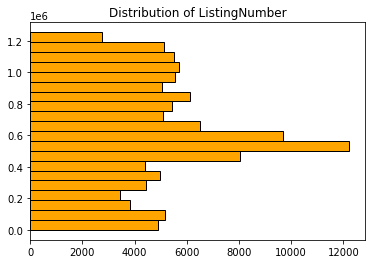

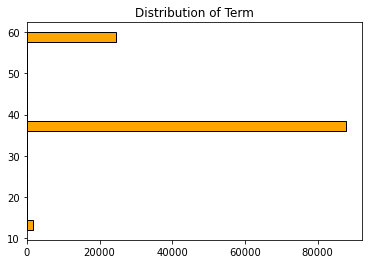

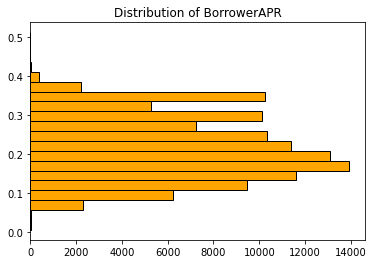

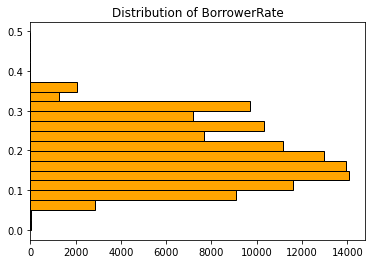

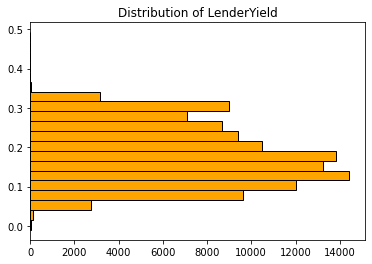

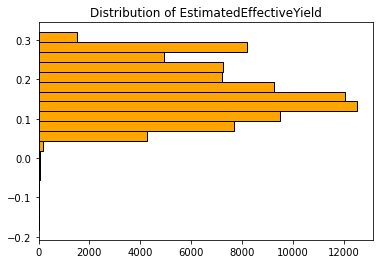

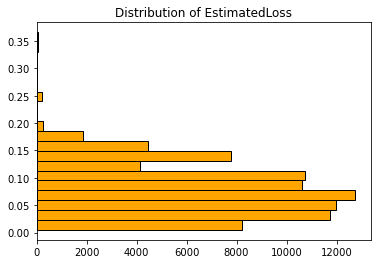

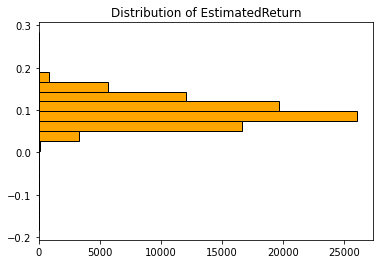

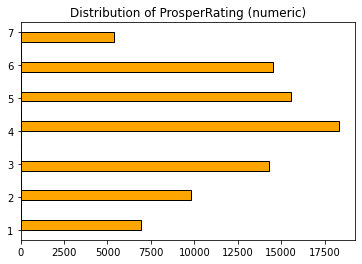

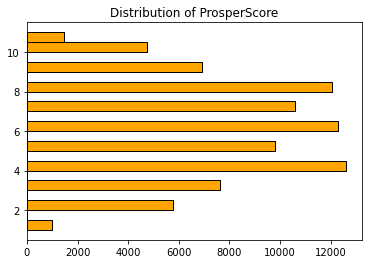

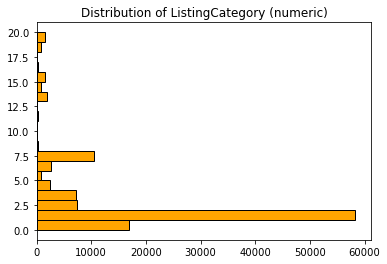

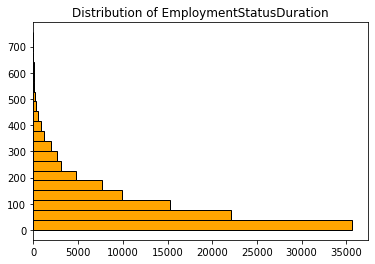

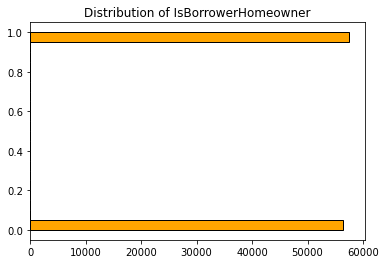

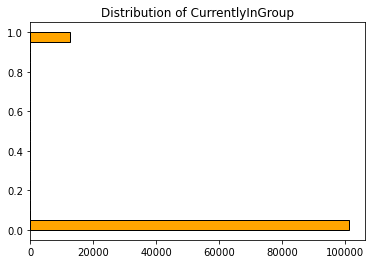

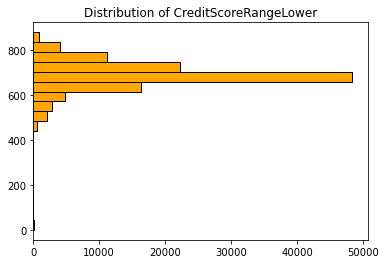

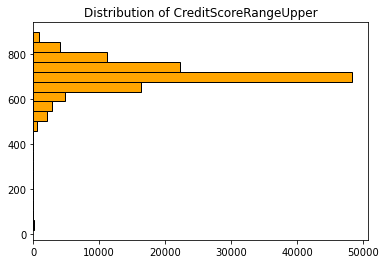

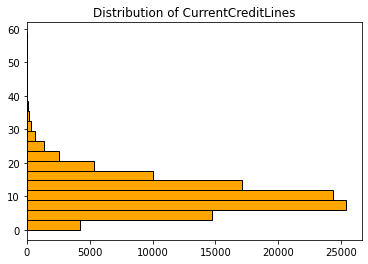

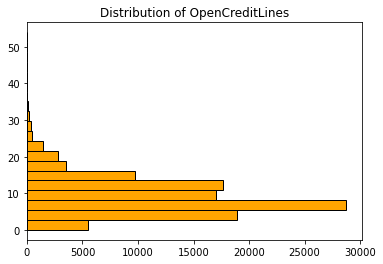

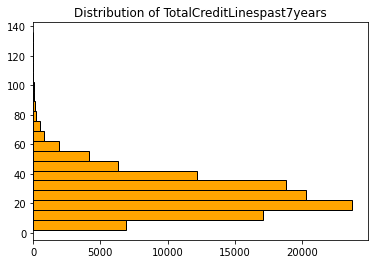

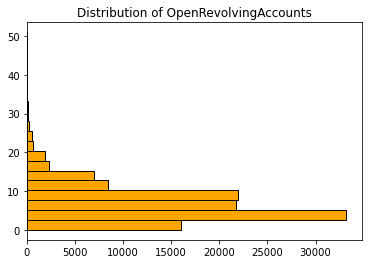

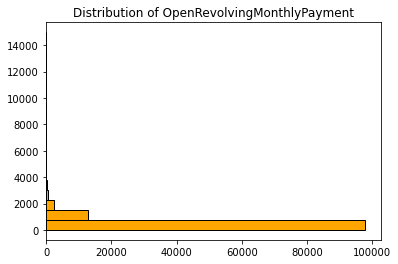

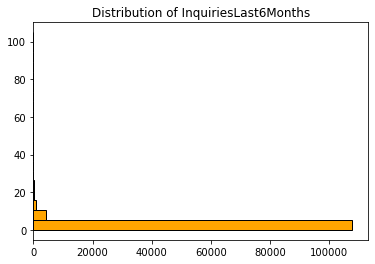

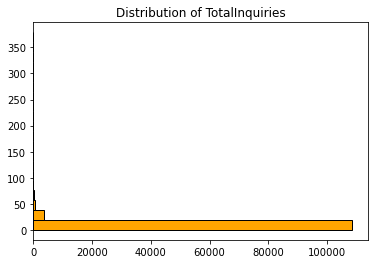

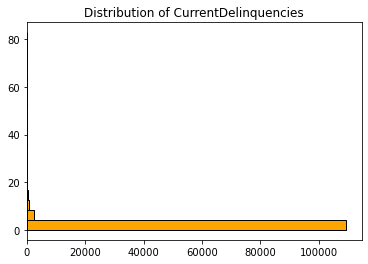

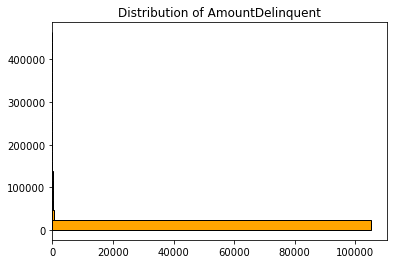

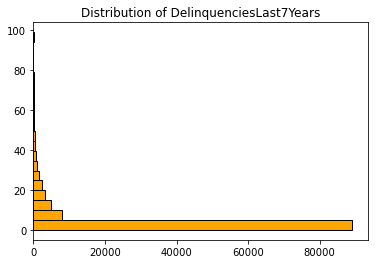

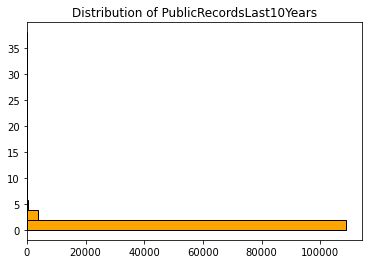

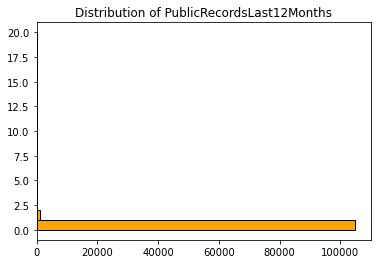

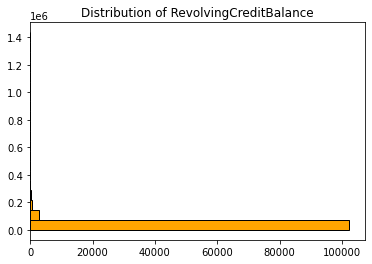

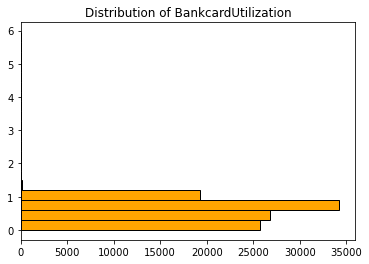

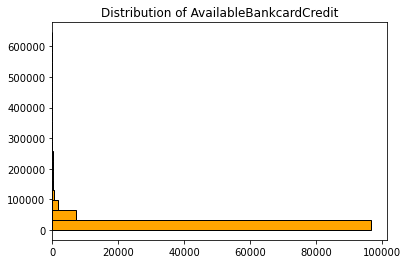

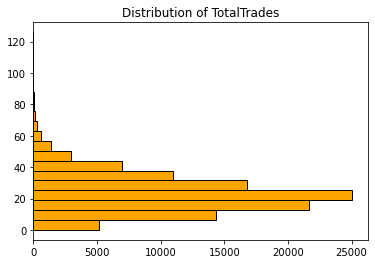

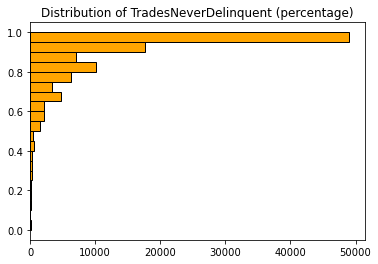

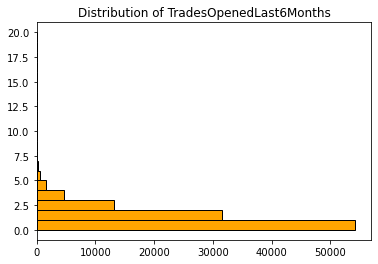

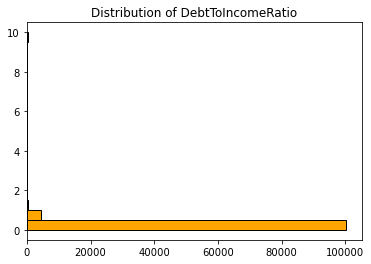

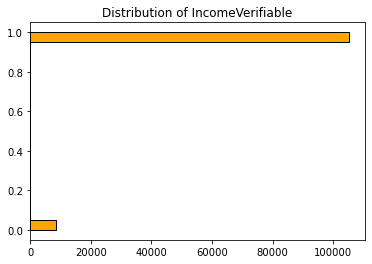

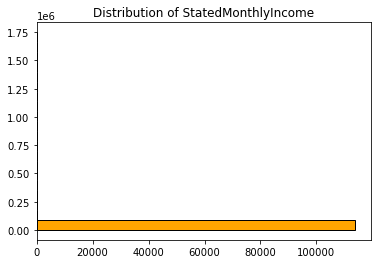

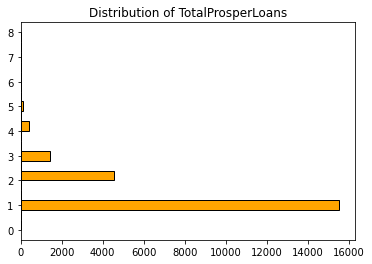

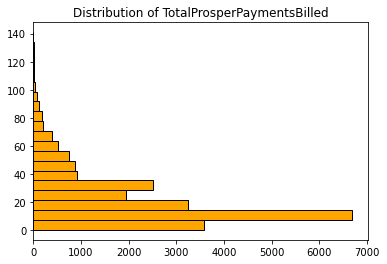

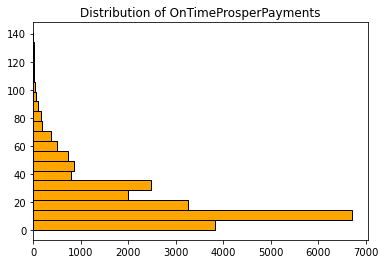

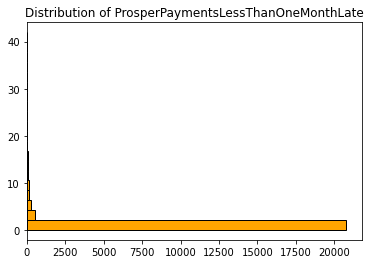

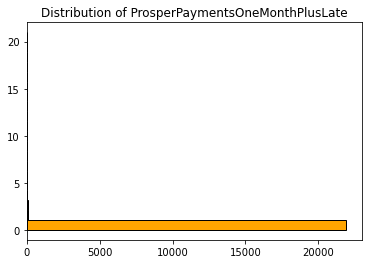

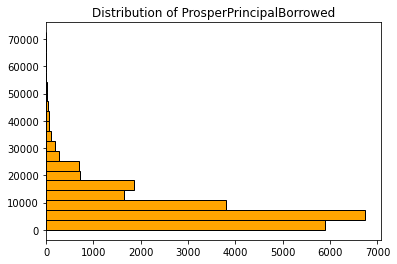

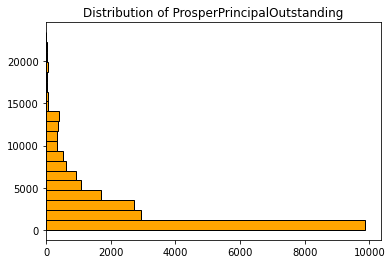

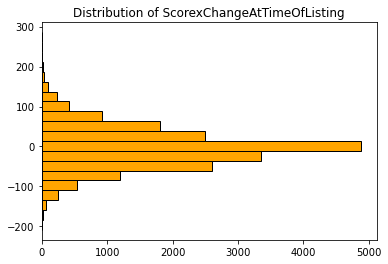

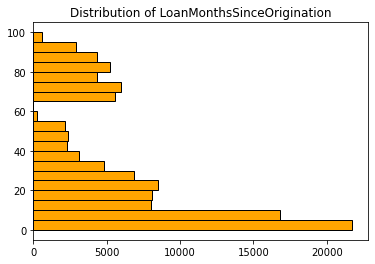

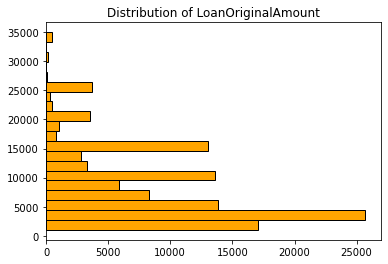

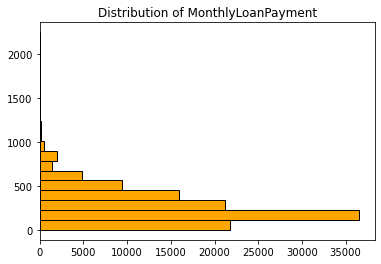

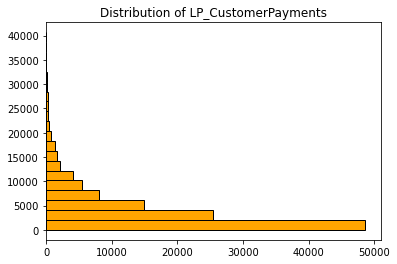

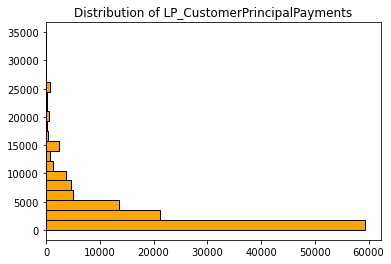

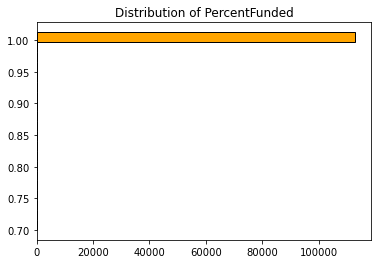

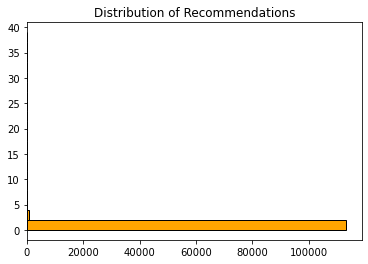

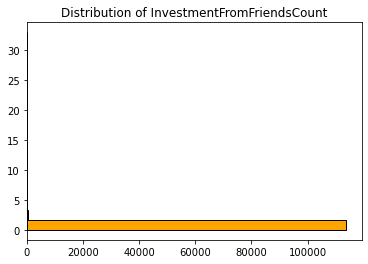

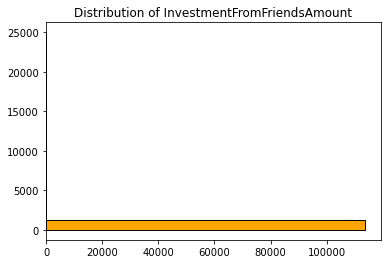

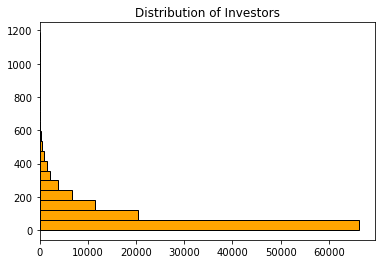

In [ ]:
for col in num_vals:
    plt.hist(X[col], color='orange', ec='black', orientation = 'horizontal', bins = 20)
    plt.title(f'Distribution of {col}')
    plt.show()
for col in cat_vals:
    df[col].value_counts().plot.barh(color='orange', ec='black' , orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

### Выводы

Датасет с большим количеством записей и факторов. Доля целевых значений достаточно низка, по некоторым факторам количество пропусков достигает 80%. Многие факторы имеют распределение, похожее на нормальное, ограниченое вменяемыми границами, есть также факторы, к которым стоило бы применить нелинейные преобразования.